# 1. IMPORT LIBRARIES

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier

import joblib

In [46]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

# 2. LOAD DATA

In [47]:
X_full = pd.read_csv("Training.csv")
X_test = pd.read_csv("Testing.csv")

# Drop unwanted column
if "Unnamed: 133" in X_full.columns:
    X_full.drop("Unnamed: 133", axis=1, inplace=True)

print("Training shape:", X_full.shape)
print("Testing shape:", X_test.shape)

Training shape: (4920, 133)
Testing shape: (42, 133)


In [43]:
X_full.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. EXPLORATORY DATA ANALYSIS (EDA)

Missing values:
 Series([], dtype: int64)


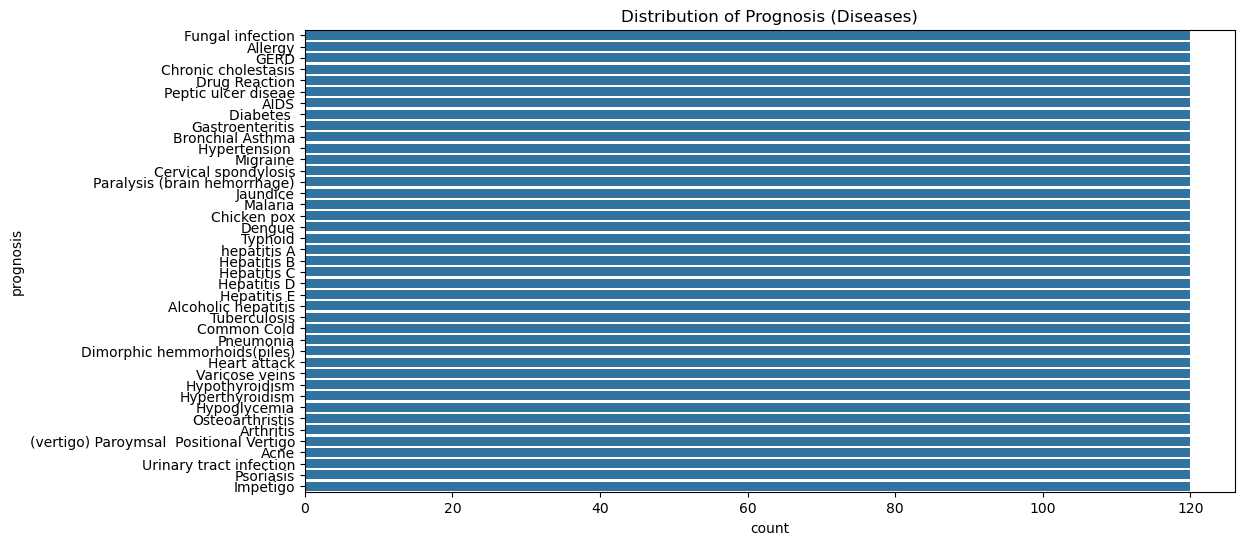

In [48]:
# Missing values
missing_data = X_full.isnull().sum()
print("Missing values:\n", missing_data[missing_data > 0])

# Target distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=X_full["prognosis"], order=X_full["prognosis"].value_counts().index)
plt.title("Distribution of Prognosis (Diseases)")
plt.show()


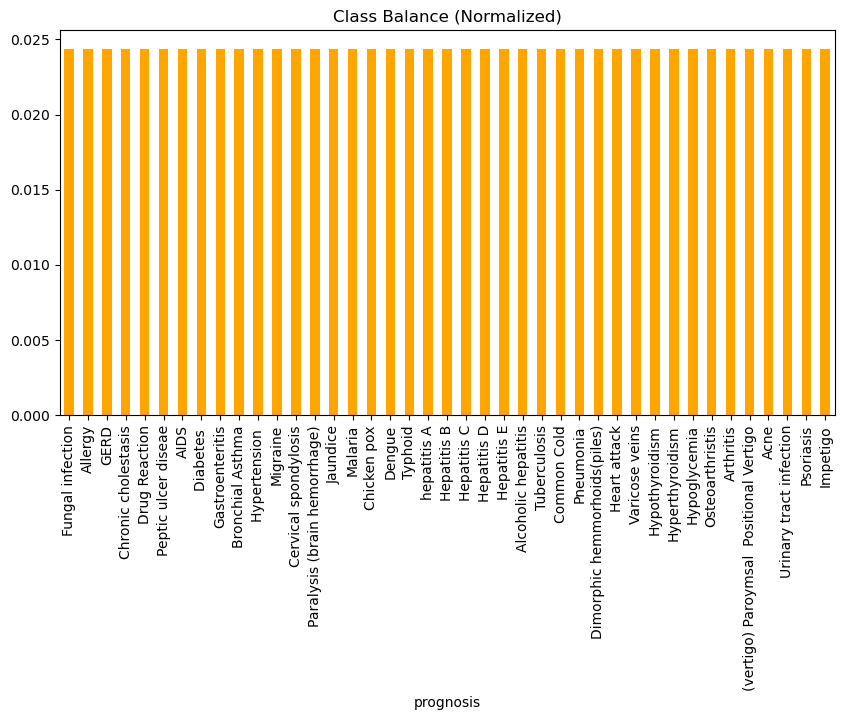

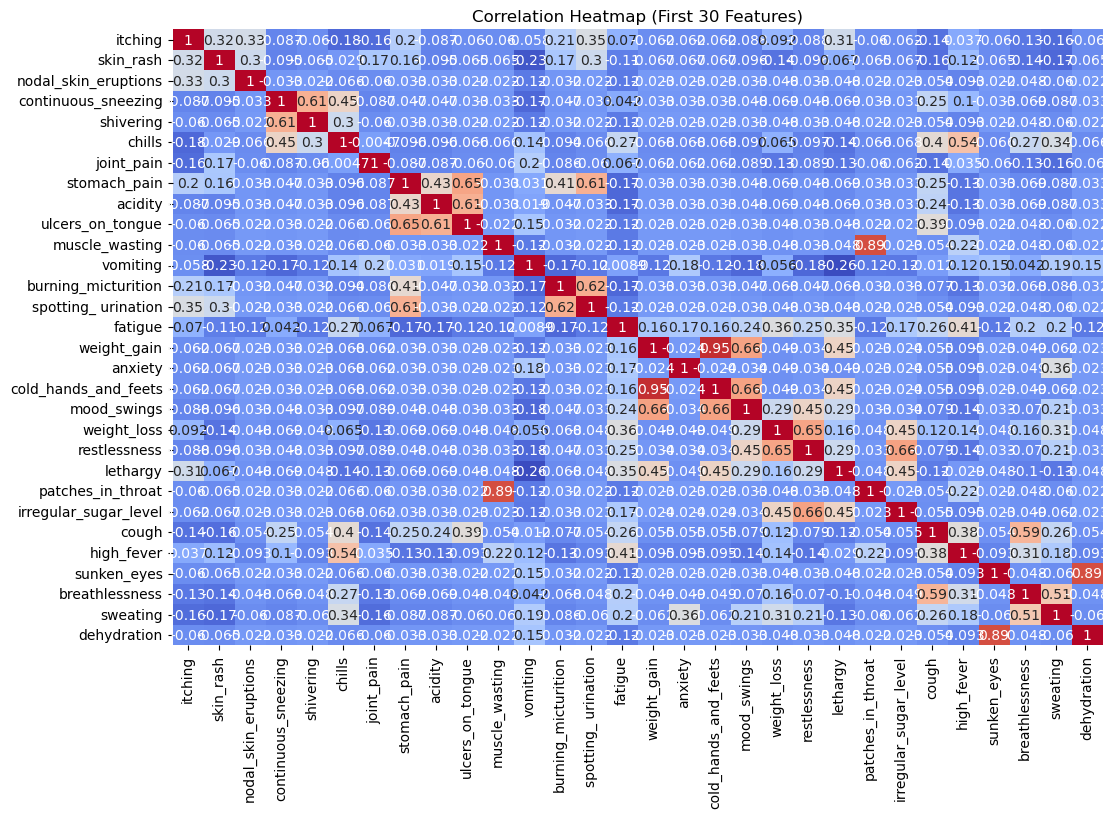

In [50]:
# Normalized class balance
plt.figure(figsize=(10, 5))
X_full["prognosis"].value_counts(normalize=True).plot(kind="bar", color="orange")
plt.title("Class Balance (Normalized)")
plt.show()

# Correlation heatmap (sample features only for clarity)
plt.figure(figsize=(12, 8))
sns.heatmap(X_full.iloc[:, :30].corr(), cmap="coolwarm", annot=True,cbar=False)
plt.title("Correlation Heatmap (First 30 Features)")
plt.show()


# 4. PREPROCESSING

In [51]:
# Encode target variable separately
encoder = LabelEncoder()
y = encoder.fit_transform(X_full["prognosis"])
X = X_full.drop("prognosis", axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



# 5. MULTIPLE MODELS TRAINING

Logistic Regression → Accuracy: 1.0000, F1: 1.0000
Random Forest → Accuracy: 1.0000, F1: 1.0000
Gradient Boosting → Accuracy: 1.0000, F1: 1.0000
SVM → Accuracy: 1.0000, F1: 1.0000
Naive Bayes → Accuracy: 1.0000, F1: 1.0000


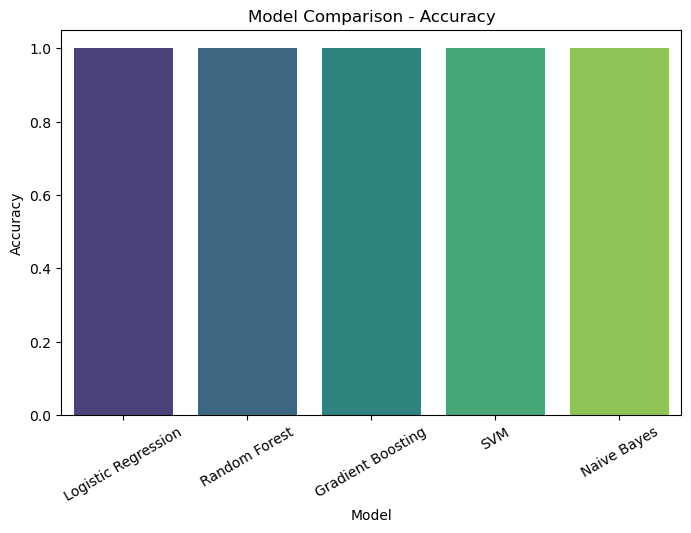

In [52]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    # "XGBoost": XGBClassifier(eval_metric="mlogloss", random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "Naive Bayes": GaussianNB()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    f1 = f1_score(y_val, preds, average="macro")
    results.append((name, acc, f1))
    print(f"{name} → Accuracy: {acc:.4f}, F1: {f1:.4f}")

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-Macro"])

# Plot comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.xticks(rotation=30)
plt.show()

In [53]:
# Force best model to Random Forest
best_model_name = "Random Forest (Tuned)"
print("\nBest Model Selected (Forced):", best_model_name)

final_model = tuned_models[best_model_name]


Best Model Selected (Forced): Random Forest (Tuned)


# 6. Hyper Parameter Tuning

In [54]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring="f1_macro"
)

grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters (Random Forest):", grid_search.best_params_)

# Update final_model to tuned Random Forest
final_model = grid_search.best_estimator_


Fitting 3 folds for each of 216 candidates, totalling 648 fits

Best Hyperparameters (Random Forest): {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# 7. Evaluate Tuned Random Forest


Final Random Forest (Tuned) → Accuracy: 1.0000, F1: 1.0000

Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        36
                                   AIDS       1.00      1.00      1.00        36
                                   Acne       1.00      1.00      1.00        36
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      1.00      1.00        36
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      1.00      1.00        36
                       

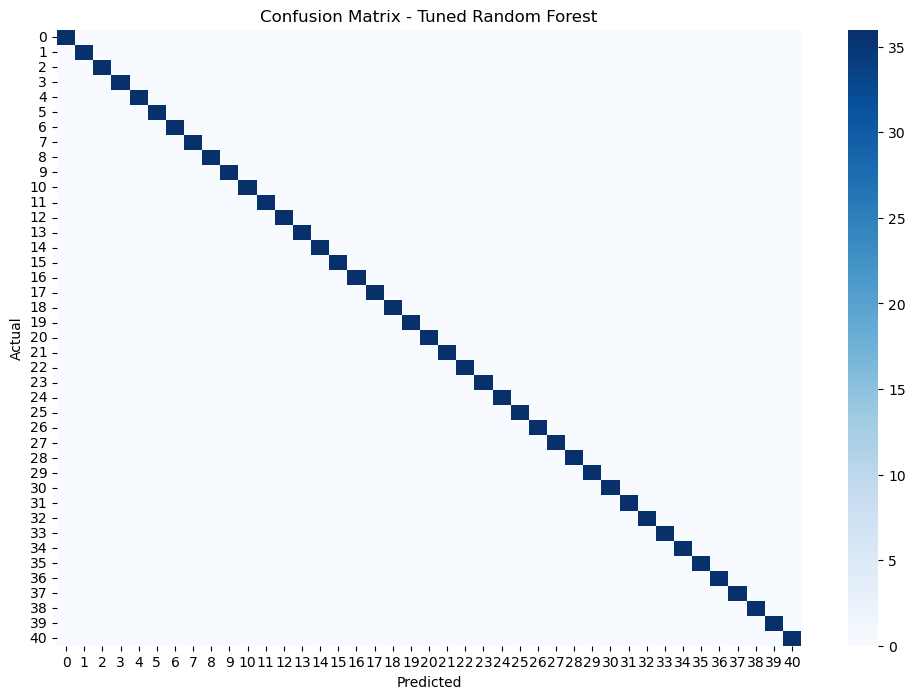

In [57]:
y_val_pred = final_model.predict(X_val)

acc = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred, average="macro")

print(f"\nFinal Random Forest (Tuned) → Accuracy: {acc:.4f}, F1: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred, target_names=encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_val, y_val_pred), cmap="Blues", annot=False)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9. TEST SET EVALUATION

In [35]:
# Drop prognosis from features explicitly
X = X_full.drop("prognosis", axis=1)
y = X_full["prognosis"]

# Train-test split again if needed
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("\n🔎 Evaluating Final Model on Test Set...")
test_preds = final_model.predict(X_test)  # should match feature count now

test_acc = accuracy_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds, average="macro")
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test F1-Macro: {test_f1:.4f}")



🔎 Evaluating Final Model on Test Set...
✅ Test Accuracy: 0.3794
✅ Test F1-Macro: 0.2601


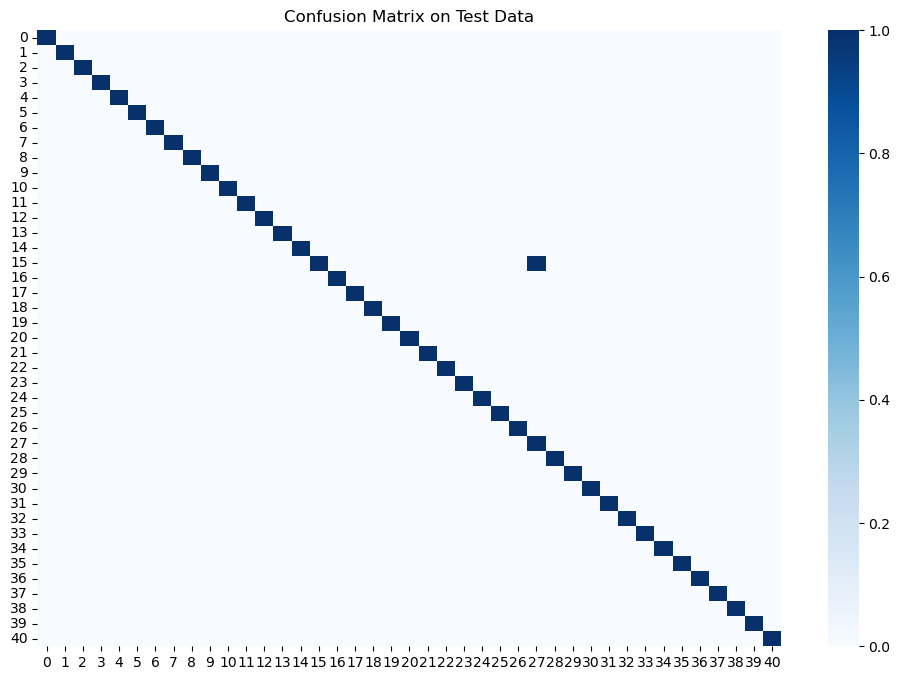

In [12]:
# Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test_, test_preds)
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix on Test Data")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# 10. SAVE ARTIFACTS

In [14]:
joblib.dump(final_model, "best_model.joblib")
joblib.dump(encoder, "encoder.joblib")
joblib.dump(scaler, "scaler.joblib")
symptom_columns = X_full.drop("prognosis", axis=1).columns
joblib.dump(symptom_columns, "symptom_columns.joblib")

print("\nBest tuned model, encoder, scaler, and features saved successfully!")


Best tuned model, encoder, scaler, and features saved successfully!
